In [21]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split  
import pandas as pd
import numpy as np
from numpy import asarray, save, load
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import os

In [28]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.01/")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
load_data = np.load('all_train_data_0.01_with_2+.npy', allow_pickle=True)
inten_df = pd.DataFrame(load_data)

# Create feature and target arrays
X = inten_df.drop(101300, axis=1) 
y = inten_df[101300].astype('int') #last column is the modified or not modified feature

In [29]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Print the accuracy
print(logreg.score(X_test, y_test))

1.0


In [5]:
print("Test set predictions: {}".format(logreg.predict(X_test)))
print("Test set accuracy: {:.2f}".format(logreg.score(X_test, y_test)))

Test set predictions: [0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1]
Test set accuracy: 1.00


In [7]:
#fit classifier
logreg.fit(X_train, y_train)

#predict using the X_test data
y_pred_rf = logreg.predict(X_test)

#build dataframe to house the scores.
df = pd.DataFrame()

#name columns
cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy']

#name required cells 
df.loc['Machine Learning Classification Method', 
       'Details'] = 'Logistic Regression'

#fit classifier onto both datasets to compare 
df.loc['Train Accuracy', 'Details'] = logreg.score(X_train, y_train) 
df.loc['Test Accuracy', 'Details'] = logreg.score(X_test, y_test)
print(df)

                                                    Details
Machine Learning Classification Method  Logistic Regression
Train Accuracy                                            1
Test Accuracy                                             1


In [6]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [8]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


Logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

The default value of C=1 provides quite good performance, with 100% accuracy on both the training and the test set. But as training and test set performance are very close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible model.

In [9]:
logreg_n = LogisticRegression(C=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg_n.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg_n.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


Varied C from 0.001 to 10000, no change. 

In [10]:
#Hold-out set in practice I: Classification
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C':c_space, 'penalty':['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv=5) 

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.



Tuned Logistic Regression Parameter: {'penalty': 'l2', 'C': 1e-05}
Tuned Logistic Regression Accuracy: 0.96


Results
Tuned Logistic Regression Parameter: {'penalty': 'l2', 'C': 1e-05}
Tuned Logistic Regression Accuracy: 0.96

Evaluated model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to , logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

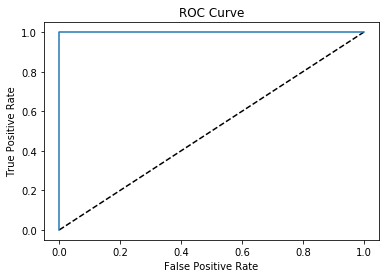

In [16]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
#AUC computation

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 1.0
AUC scores computed using 5-fold cross-validation: [0.95833333 1.         1.         1.         1.        ]


## PCA 

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
#build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=16)),
        ('classifier', LogisticRegression(random_state=42))])

#fit the pipeline to the training data
pipe.fit(X_train, y_train)

#score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

#prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.27512629 0.09226276 0.07788127 0.05766278 0.05351533 0.04992562
 0.04754853 0.04384599 0.04052781 0.03877501 0.03730112 0.0309969
 0.02703635 0.02537425 0.01709722 0.01563782]
57.9% test set accuracy


Similar to how we plotted testing and training accurracy of varying k nearest neighbours, we can see do the same for varying numbers of principal components to observe how this affects accuracy of the training and testing datasets. 

/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/LeandroJumilla/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

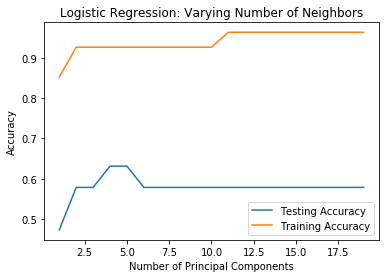

In [20]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 20)
train_accuracy = np.empty(len(n_components))
test_accuracy = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=k)),
        ('classifier', LogisticRegression(random_state=42))])

    #fit the pipeline to to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('Logistic Regression: Varying Number of Components')
plt.plot(n_components, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_components, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

## PCA without scaling

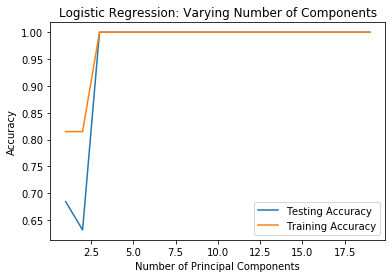

In [23]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 20)
train_accuracy = np.empty(len(n_components))
test_accuracy = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', LogisticRegression(random_state=42))])

    #fit the pipeline to to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set 
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('Logistic Regression: Varying Number of Components')
plt.plot(n_components, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_components, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

## Hold-out Set
Logistic Regression (1+ & 2+ masses) lowest optimum number of PCs with Scaling: 11
Logistic Regression (1+ & 2+ masses) lowest optimum number of PCs without Scaling: 3

In [30]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/combined_hold_out/")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
hold_out_data = np.load('combined_hold_out_test.npy', allow_pickle=True)
hold_out_df = pd.DataFrame(hold_out_data)

# Create feature and target arrays
X_hold_out = hold_out_df.drop(101300, axis=1) 
y_hold_out = hold_out_df[101300].astype('int') #last column is the modified or not modified feature

In [31]:
#create variables for number of each principal components
scaled_PC = 11
unscaled_PC = 3

#setup the pipeline with scaler
pipe_1 = Pipeline([('scaler', StandardScaler()),
                    ('reducer', PCA(scaled_PC)),
                    ('logreg', LogisticRegression())])
        
#create second pipeline with no scaler
pipe_2 = Pipeline([('reducer', PCA(unscaled_PC)),
                    ('logreg', LogisticRegression())])

#fit the pipeline to the whole data set; hold out set acts as test set 
knn_pca_scaled = pipe_1.fit(X, y)

#fit the seoncd pipeline to the whole data set. 
knn_pca_unscaled = pipe_2.fit(X, y)

# Compute and print metrics
print('Hold-out Set Accuracy with Scaling: {}'.format(knn_pca_scaled.score(X_hold_out, y_hold_out)))
print('Hold-out Set Accuracy without Scaling: {}'.format(knn_pca_unscaled.score(X_hold_out, y_hold_out)))

Hold-out Set Accuracy with Scaling: 0.7692307692307693
Hold-out Set Accuracy without Scaling: 1.0
